Implementation of a Simple Chatbot using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages # this adds messages to the list

In [2]:
# Basic building block
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [4]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("groq:llama-3.3-70b-versatile")
llm.invoke("Hey bro !!")

/Users/maruthienugula/RAG_learnings/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content="What's up! How's it going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 38, 'total_tokens': 48, 'completion_time': 0.022397959, 'completion_tokens_details': None, 'prompt_time': 0.001722727, 'prompt_tokens_details': None, 'queue_time': 0.05254923, 'total_time': 0.024120686}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c1a7d-2755-7551-8055-82cf1b6f39b5-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 38, 'output_tokens': 10, 'total_tokens': 48})

Creation of Nodes

In [5]:
def minibot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

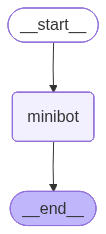

In [6]:
graph = StateGraph(State)

# add node
graph.add_node("minibot",minibot)

# add edges
graph.add_edge(START,"minibot")
graph.add_edge("minibot",END)

#Compile this
graph_builder = graph.compile()

#View
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
graph_builder.invoke({"messages":"How are you ?"})

{'messages': [HumanMessage(content='How are you ?', additional_kwargs={}, response_metadata={}, id='038449bd-8141-47f2-be5f-2bfbf290b49e'),
  AIMessage(content="I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 39, 'total_tokens': 85, 'completion_time': 0.092058363, 'completion_tokens_details': None, 'prompt_time': 0.001696706, 'prompt_tokens_details': None, 'queue_time': 0.059124424, 'total_time': 0.093755069}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_68f543a7cc', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c1a7d-3f4c-7011-9fb4-87e34ca4ae40-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 39, 'output_tokens': 46, 'tota

In [ ]:
responses = []
for i in range(3):
    query = input("input :")
    response = graph_builder.invoke({"messages":query})
    responses.append("Human")
    responses.append(response['messages'][0].content)
    responses.append("AI")
    responses.append(response['messages'][1].content)

    i=i+1
    

In [9]:
responses

['Human',
 'what is an apple',
 'AI',
 "A simple yet delicious question!\n\nAn apple is a type of fruit that grows on apple trees (Malus domestica). It's a juicy, sweet, and crunchy fruit that's one of the most widely consumed fruits in the world.\n\nHere are some key characteristics of an apple:\n\n1. **Appearance**: Apples are typically round or oval in shape, with a thin skin that's often red, green, yellow, or a combination of these colors.\n2. **Taste**: The flavor of an apple can range from sweet to tart, depending on the variety.\n3. **Texture**: Apples are crunchy and firm, with a juicy pulp that's made up of cells filled with water and sugars.\n4. **Size**: Apples come in a range of sizes, from small (e.g., crabapples) to large (e.g., Granny Smith).\n5. **Varieties**: There are over 7,500 known varieties of apples, each with its own unique characteristics, such as flavor, texture, and color.\n\nApples are a great source of nutrients, including:\n\n* Fiber\n* Vitamins A and C\n

# Therefore we can say that it doesn't remember